# Sarokpontok keresése Shi-Tomasi sarokdetektorral OpenCV-ben

A [Shi-Tomasi sarokdetektort](http://www.ai.mit.edu/courses/6.891/handouts/shi94good.pdf) mozgás kapcsán jól követhető pontok detektálására fejlesztették ki. 

A Shi-Tomasi sarokdetektor a Harris sarokdetektorhoz hasonlóan szintén a sajátértékek alapján határozza meg a sarkossági válaszfüggvényt. Ez a detektor azonban a két sajátérték minimumát veszi figyelembe.
Legyen $M(x,y)$ egy az $I$ kép $(x,y)$ pontjában vett deriváltjaiból számított $2\times 2$-es mátrix
$$
M = \sum_{x,y} w(x,y) \begin{bmatrix}I_x^2 & I_xI_y \\ I_xI_y & I_y^2 \end{bmatrix}, 
$$
ahol $I_x$ és $I_y$ rendre az $I$ kép $x-$ és $y-$ irányú deriváltjait tartalmazza, $w(x,y)$ pedig egy súlyfüggvény (az egyszerűség kedvéért ennek értéke lehet 1).

## Sarkossági mérőszám 

A sarkossági mérőszámot az $M$ mátrix $\gamma_1$ és $\gamma_2$ sajátértékeinek minimuma adja:
$$
R(x,y) = \min(\gamma_1, \gamma_2)
$$

## A Shi-Tomasi sarokdetektor használata
A Shi-Tomasi sarokdetektorhoz a *goodFeaturesToTrack()* függvényt használjuk.  
A függvényben meg kell adni 
* a szürkeárnyalatos képet, amelyen a sarokpontokat szeretnénk meghatározni,
* a detektálandó sarokpontok maximális számát,
* a sarkosság minőségi küszöbét (0-1 közötti érték) 
* a detektált pontok közötti minimális euklideszi távolságot (hogy ugynazon pontot ne detektáljuk kétszer)
* a maszkot (ha van)
* a kereső ablak blokkméretét
* használjon-e a függvény Harris detektort
* a k paramétert, amennyiben a Harris detektort használjuk




# Példaprogram

Az alábbi program az input képen keres jellemzőpontokat a Shi-Tomasi sarokdetektorral. A képet a notebook-fájl mellé érdemes elhelyezni, vagy át kell írni az elérési útvonalat.

A lépések a következők: 
1. Megnyitjuk a képet.
2. Az RGB színes képet szürkeárnyalatosság konvertáljuk és a továbbiakban ezzel a változattal dolgozunk.
3. Beállítjuk a detektor paramétereit (maximális sarokpontok száma, sarokpontok minősége, blokkméret, minimális távolság)
4. Elvégezzük a sarokpont detektálást a *goodFeaturesToTrack()* függvénynel. Az eredményt a *corners* változóban kapjuk, amely a sarokpontkoordináták listáját tartalmazza.
5. A sarokpontokat egyenként kirajzoljuk. 

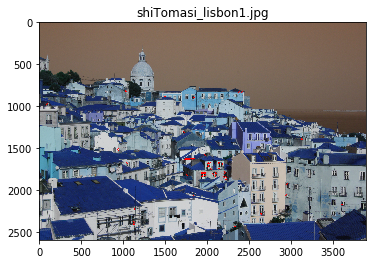

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt


SOURCE_IMAGE='lisbon1.jpg'
OUTPUT_IMAGE='shiTomasi_lisbon1.jpg'

## kép beolvasása
img = cv2.imread(SOURCE_IMAGE);

## a képet szürkeárnyalatossá konvertáljuk
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

## sarokpontok keresése Shi-Tomasi sarokdetektorral
## a detektor a sarokpontok koordinátáit adja meg
##  - meg kell adnunk az alábbi paramétereket:
maxCorners = 0     # ha nulla számot adunk meg, akkor nincs korlátozás a pontok számát illetően
qualityLevel = 0.5 # hány százalékát tartsa meg a pontoknak (a legerősebbek maradnak meg)
blockSize = 3      # az ablakméret a sajátérték és sajátvektor számításhoz
minDistance = 10   # legalább ennyi legyen a detektált pontok Euklideszi távolsága
k = 0.004          # a Harris sarokdetektor paramétere (lásd a képletet a leírásban, ez most nem szükséges) 
#gray_img = np.float32(gray_img)
corners = cv2.goodFeaturesToTrack(gray_img, maxCorners, qualityLevel, minDistance) # az utolsó néhány paraméter alapértelmezett
corners = np.int0(corners);

out_img = img
for i in corners:
	x,y = i.ravel() # numpy függvény
	cv2.circle(out_img, (x,y), 10, 255, 3) 

cv2.imwrite(OUTPUT_IMAGE, out_img)
plt.imshow(out_img);
plt.title(OUTPUT_IMAGE)
plt.show()